<a href="https://colab.research.google.com/github/davidpastuszek/nn/blob/main/nn_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Aktivační fce

In [2]:
def sigmoid(z):
  return np.where(z<0, np.exp(z)/(1+np.exp(z)), 1/(1+np.exp(-z))) # je treba osetrit extremni hodnoty

def sigmoid_der(x):
  return np.vectorize(lambda y: y*(1-y))(x) # potrebuju pro kazdy prvek arraye (sigmoidu - derivace sigmoidu je sigm * (1- sigm ))

Ztrátová fce

In [3]:
def ztratova_fce(e):
  return sum(e**2)

def ztratova_der(e):
  return -1 * (2*e)

Neuronová síť

In [14]:
class sit:
    def __init__(self, x, y, p_neuronu, act_fce, der_act, loss_fce, der_loss):
        self.x = x
        self.y = y
        self.pn = p_neuronu
        self.ni = np.shape(x)[0]
        self.nj = np.shape(x)[1] # pocet radek na vstupu
        self.act_fce = act_fce
        self.der_act = der_act
        self.loss_fce = loss_fce
        self.der_loss = der_loss
        self.LR = 1
        # init vah:
        self.vahy1 = (np.random.rand(self.nj, self.pn)+0.5)/self.pn
        self.vahy2 = (np.random.rand(self.pn, 1)+0.5)/self.pn
        
        self.forward_prop()
        
    def forward_prop(self):
        self.LO1 = self.act_fce(np.matmul(self.x, self.vahy1))
        self.y_hat = self.act_fce(np.matmul(self.LO1, self.vahy2))
        self.e = self.y - self.y_hat
        
    def backward_prop(self):
            self.delta2 = np.matmul(np.transpose(self.LO1), (self.der_loss(self.e)*self.der_act(self.y_hat)))
            self.delta1 = np.matmul(np.transpose(self.x),
                                   np.matmul((self.der_loss(self.e) *  self.der_act(self.y_hat)),
                                            np.transpose(self.vahy2)) * self.der_act(self.LO1))
            self.vahy1 = self.vahy1 - self.delta1 * self.LR
            self.vahy2 = self.vahy2 - self.delta2 * self.LR
        
    def forecast(self, X_new):
        self.Lf = self.act_fce(np.matmul(X_new, self.vahy1))
        self.predict = self.act_fce(np.matmul(self.Lf, self.vahy2))
        return self.predict
    
    def train(self, n_epochs, LR):
        self.LR = LR
        self.n_epochs = n_epochs
        self.training = np.zeros(n_epochs)
        
        for i in range(self.n_epochs):
            self.backward_prop()
            self.forward_prop()
            #informace pro mě dal:
            self.training[i] = self.loss_fce(self.e)
            if i % 50 ==0:
                print(f"{i}. iterace, ztrata: {self.training[i]:.2f}")

In [15]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])

nase_sit = sit(X,Y, 2, sigmoid, sigmoid_der, ztratova_fce, ztratova_der)

In [46]:
nase_sit.train(1000, 0.1)

0. iterace, ztrata: 0.13
50. iterace, ztrata: 0.13
100. iterace, ztrata: 0.13
150. iterace, ztrata: 0.13
200. iterace, ztrata: 0.13
250. iterace, ztrata: 0.13
300. iterace, ztrata: 0.13
350. iterace, ztrata: 0.13
400. iterace, ztrata: 0.13
450. iterace, ztrata: 0.13
500. iterace, ztrata: 0.12
550. iterace, ztrata: 0.12
600. iterace, ztrata: 0.12
650. iterace, ztrata: 0.12
700. iterace, ztrata: 0.12
750. iterace, ztrata: 0.12
800. iterace, ztrata: 0.12
850. iterace, ztrata: 0.12
900. iterace, ztrata: 0.12
950. iterace, ztrata: 0.12


In [25]:
import pandas as pd
data = pd.read_csv("mtcars.csv", sep=";")

Y = np.array(data["mpg"])
X = np.array(data.loc[:,data.columns != "mpg"])

Y.resize([len(Y), 1])
Y.shape

Ys = np.apply_along_axis(lambda x: (x-min(x))/(max(x)-min(x)), 0, Y)
Xs = np.apply_along_axis(lambda x: (x-min(x))/(max(x)-min(x)), 0, X)

0. iterace, ztrata: 993.00
50. iterace, ztrata: 993.00
100. iterace, ztrata: 993.00
150. iterace, ztrata: 993.00
200. iterace, ztrata: 993.00
250. iterace, ztrata: 993.00
300. iterace, ztrata: 993.00
350. iterace, ztrata: 993.00
400. iterace, ztrata: 993.00
450. iterace, ztrata: 993.00
500. iterace, ztrata: 993.00
550. iterace, ztrata: 993.00
600. iterace, ztrata: 993.00
650. iterace, ztrata: 993.00
700. iterace, ztrata: 993.00
750. iterace, ztrata: 993.00
800. iterace, ztrata: 993.00
850. iterace, ztrata: 993.00
900. iterace, ztrata: 993.00
950. iterace, ztrata: 993.00


<ipython-input-45-2638f6ab6b10>:10: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(np.abs(Y-fit)/Y)


inf

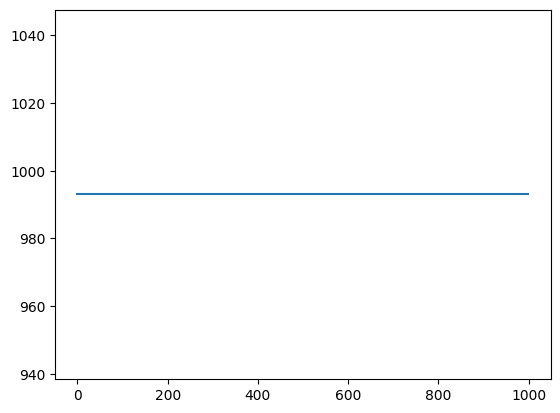

In [45]:
ymin = min(Y)
ymax = max(Y)

auta = sit(Xs, Ys, 6, sigmoid, sigmoid_der, ztratova_fce, ztratova_der)
auta.train(1000, 0.1)

plt.plot(auta.training)

fit = auta.y_hat*(ymax-ymin)+ymin
np.mean(np.abs(Y-fit)/Y)

Dating

In [28]:
data = pd.read_csv("dating.csv")

0. iterace, ztrata: 605.98
50. iterace, ztrata: 605.97
100. iterace, ztrata: 605.96
150. iterace, ztrata: 605.94
200. iterace, ztrata: 605.84
250. iterace, ztrata: 536.09
300. iterace, ztrata: 205.63
350. iterace, ztrata: 106.82
400. iterace, ztrata: 101.30
450. iterace, ztrata: 143.01
500. iterace, ztrata: 92.18
550. iterace, ztrata: 89.78
600. iterace, ztrata: 117.82
650. iterace, ztrata: 112.43
700. iterace, ztrata: 95.92
750. iterace, ztrata: 98.43
800. iterace, ztrata: 96.42
850. iterace, ztrata: 94.99
900. iterace, ztrata: 93.84
950. iterace, ztrata: 92.88


<ipython-input-44-d7d4eed191e1>:23: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(np.abs(y_train-fit)/y_train)


inf

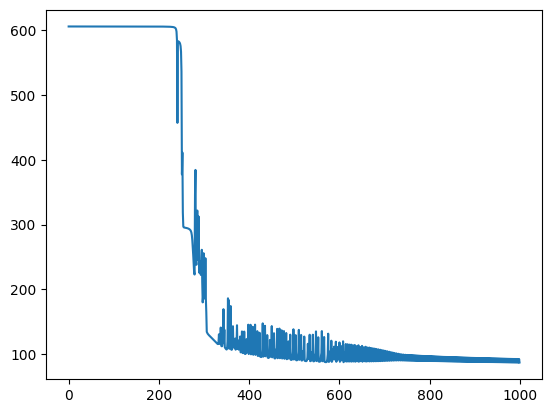

In [44]:
from sklearn.model_selection import train_test_split

X = np.array(data.loc[:, data.columns != "match"])
Y = np.array(data["match"])

Y.resize([len(Y), 1])
Y.shape

Ys = np.apply_along_axis(lambda x: (x-min(x))/(max(x)-min(x)), 0, Y)
Xs = np.apply_along_axis(lambda x: (x-min(x))/(max(x)-min(x)), 0, X)

X_train, X_test, y_train, y_test = train_test_split(
    Xs, Ys, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1)

dating = sit(X_train, y_train, 40, sigmoid, sigmoid_der, ztratova_fce, ztratova_der)
dating.train(1000, 0.01)

plt.plot(dating.training)

fit = dating.y_hat*(ymax-ymin)+ymin
np.mean(np.abs(y_train-fit)/y_train)


In [37]:
fit = dating.y_hat*(ymax-ymin)+ymin
np.mean(np.abs(y_train-fit)/y_train)

<ipython-input-37-739c852d64c5>:2: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(np.abs(y_train-fit)/y_train)


inf

In [40]:
y_hat = [1 if i>=0.5 else 0 for i in dating.y_hat]

In [ ]:
class minibatch:
  def __init__(self, x, y, p_neuronu, act_fce, der_act, loss_fce, der_loss, n_batch):
    self.x = x
    self.y = y
    self.pn = p_neuronu
    self.ni = np.shape(x)[0]
    self.nj = np.shape(x)[1]
    self.act_fce = act_fce
    self.der_act = der_act
    self.loss_fce = loss_fce
    self.der_loss = der_loss
    self.n_batch = n_batch
    self.data_id = np.array([np.random.choice(range(n_batch)) for i in range(self.ni)])

    self.site = []

    self.total_sit = sit(x, y, p_neuronu, act_fce, der_act, loss_fce, der_act)

    for i in range(n_batch):
      self.site.append(sit(x[self.data_id==i,:], y[self.data_id==i,:],
                           p_neuronu, act_fce, der_act, loss_fce, der_act))
      
  def mean_vahy(self):
    self.mean_vahy1 = np.zeros((self.nj, self.pn))
    self.mean_vahy2 = np.zeros((self.pn, 1))

    for i in range(self.n_batch):
      self.mean_vahy1 += (self.site[i].vahy1/self.n_batch)
      self.mean_vahy2 += (self.site[i].vahy2/self.n_batch)
